In [1]:
# Install specific compatible versions directly
!pip install numpy==1.24.3 pandas==2.1.3 scipy==1.11.3 prophet matplotlib seaborn --user

# Now import
import pandas as pd
import numpy as np
print(f"NumPy: {np.__version__}, Pandas: {pd.__version__}")

df = pd.read_csv(r"C:\Users\jorda\Downloads\retail_store_inventory.csv")
print(df.head())

NumPy: 1.24.3, Pandas: 2.1.3
         Date Store ID Product ID     Category Region  Inventory Level  \
0  2022-01-01     S001      P0001    Groceries  North              231   
1  2022-01-01     S001      P0002         Toys  South              204   
2  2022-01-01     S001      P0003         Toys   West              102   
3  2022-01-01     S001      P0004         Toys  North              469   
4  2022-01-01     S001      P0005  Electronics   East              166   

   Units Sold  Units Ordered  Demand Forecast  Price  Discount  \
0         127             55           135.47  33.50        20   
1         150             66           144.04  63.01        20   
2          65             51            74.02  27.99        10   
3          61            164            62.18  32.72        10   
4          14            135             9.26  73.64         0   

  Weather Condition  Holiday/Promotion  Competitor Pricing Seasonality  
0             Rainy                  0               29.

In [2]:
#Summarize
print(df.info()) #Looking for missing values and Identifying the data types
print(df.describe()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 8.4+

In [3]:
#EDA
#Import Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Style for Plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

#Check for missing values 
print("=== Missing Values ANALYSIS ===")
missing_values = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df) * 100)
missing_df = pd.DataFrame({
    'Missing Values' : missing_values,
    'Percentage (%)' : missing_values
})
print(missing_df[missing_df['Missing Values'] > 0])

=== Missing Values ANALYSIS ===
Empty DataFrame
Columns: [Missing Values, Percentage (%)]
Index: []


In [4]:
#Convert Date column to datetime
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    print(f"\nDate range: {df['Date'].min()} to {df['Date'].max()}")


Date range: 2022-01-01 00:00:00 to 2024-01-01 00:00:00


In [5]:
#Data Overview
print("\=n== Data Overview ===")
print(f"Dataset shape: {df.shape}")
print(f"Number of stores: {df['Store ID'].nunique()}")
print(f"Number of products: {df['Product ID'].nunique()}")
if 'Category' in df.columns:
    print(f"Categories: {df['Category'].unique()}")


\=n== Data Overview ===
Dataset shape: (73100, 15)
Number of stores: 5
Number of products: 20
Categories: ['Groceries' 'Toys' 'Electronics' 'Furniture' 'Clothing']


In [6]:
#Key Metrics Analysis
print("\n=== KEY METRICS ===")
if 'Units Sold' in df.columns:
    print(f"Total units sold: {df['Units Sold'].sum():,}")
    print(f"Average daily sales: {df['Units Sold'].mean():.2f}")

if 'Inventory Level' in df.columns:
    print(f"Average inventory level: {df['Inventory Level'].mean():.2f}")
    #Calculate stockout rate
    stockout_days = (df['Inventory Level'] == 0).sum()
    stockout_rate = (stockout_days / len(df)) * 100
    print(f"Stockout rate: {stockout_rate:.2f}%")


=== KEY METRICS ===
Total units sold: 9,975,582
Average daily sales: 136.46
Average inventory level: 274.47
Stockout rate: 0.00%



=== CREATING VISUALIZATIONS ===


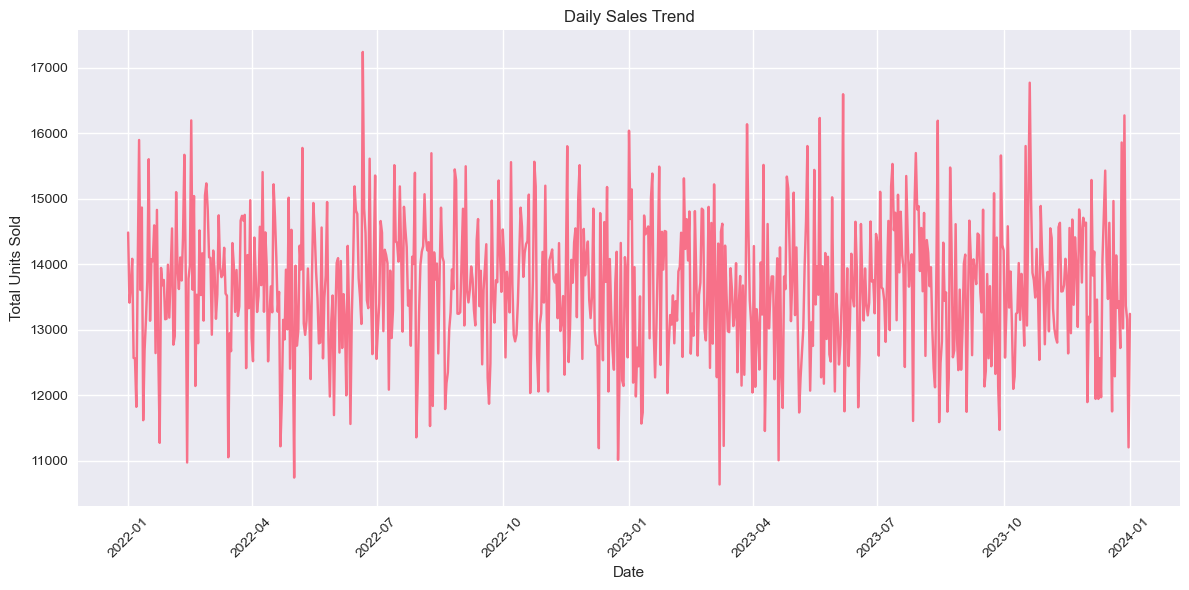

In [7]:
# Visualizations
print("\n=== CREATING VISUALIZATIONS ===")

# Plot 1: Sales Trend Over Time
plt.figure(figsize=(12, 6))
if 'Date' in df.columns and 'Units Sold' in df.columns:
    daily_sales = df.groupby('Date')['Units Sold'].sum()
    plt.plot(daily_sales.index, daily_sales.values)
    plt.title('Daily Sales Trend')
    plt.xlabel('Date')
    plt.ylabel('Total Units Sold')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show

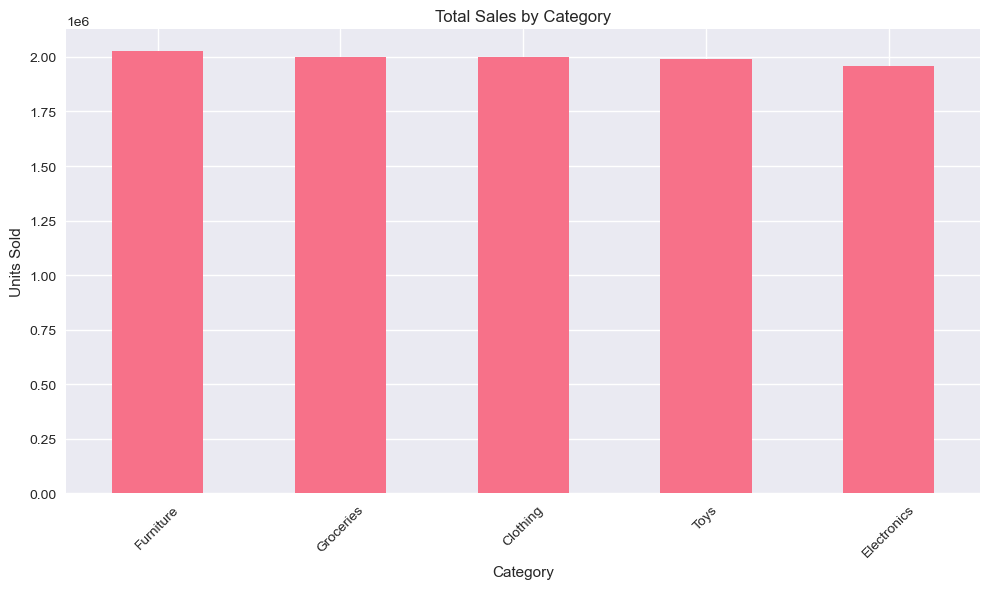

In [8]:
# Plot 2: Sales by Category
if 'Category' in df.columns and 'Units Sold' in df.columns:
    plt.figure(figsize=(10, 6))
    category_sales = df.groupby('Category')['Units Sold'].sum().sort_values(ascending=False)
    category_sales.plot(kind='bar')
    plt.title('Total Sales by Category')
    plt.xlabel('Category')
    plt.ylabel('Units Sold')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

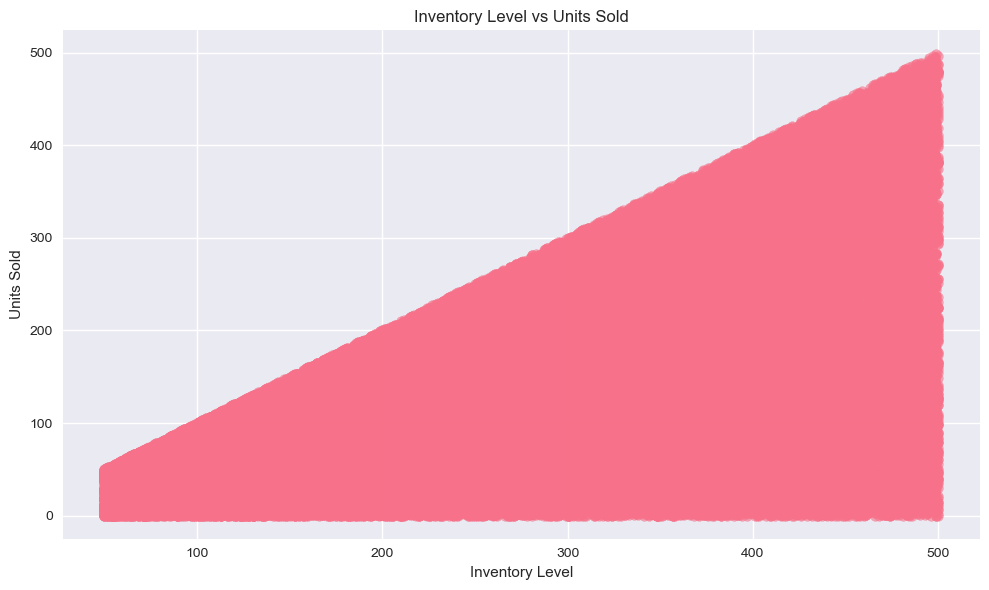

In [9]:
# Plot 3: Inventory vs Sales Scatter
if 'Inventory Level' in df.columns and 'Units Sold' in df.columns:
    plt.figure(figsize=(10, 6))
    plt.scatter(df['Inventory Level'], df['Units Sold'], alpha=0.6)
    plt.title('Inventory Level vs Units Sold')
    plt.xlabel('Inventory Level')
    plt.ylabel('Units Sold')
    plt.tight_layout()
    plt.show()

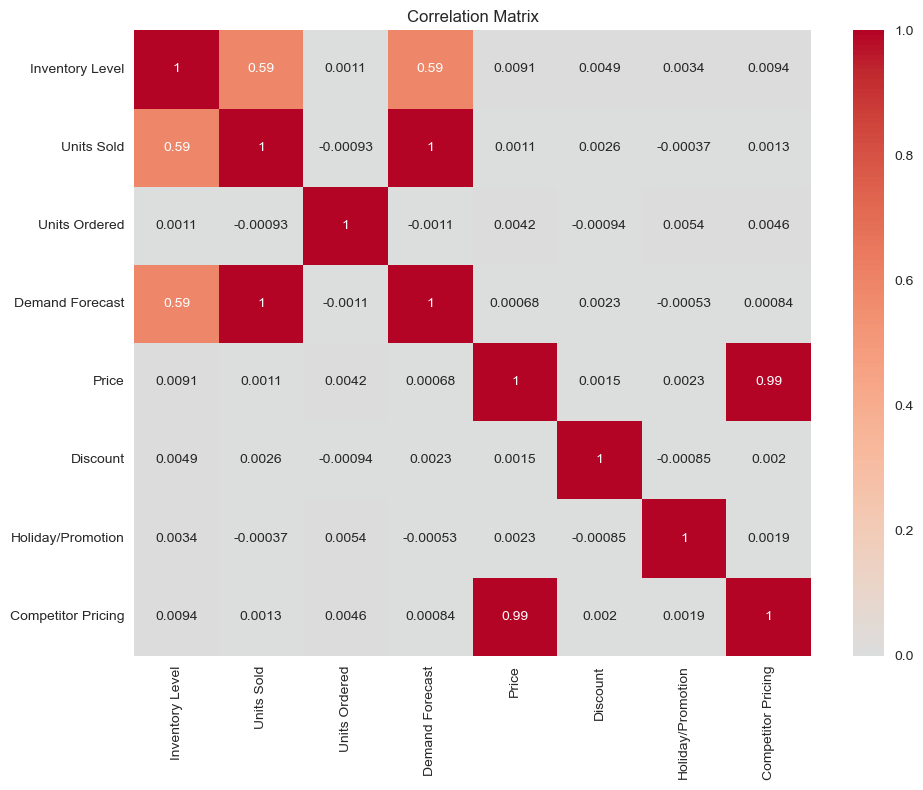

In [10]:
#Plot 4: Correlation Heatmap
numeric_cols = df.select_dtypes(include=[np.number]).columns
if len(numeric_cols) > 1:
    plt.figure(figsize=(10, 8))
    correlation_matrix = df[numeric_cols].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix')
    plt.tight_layout()
    plt.show()

In [11]:
#Advanced Analysis: Stockout Analysis
print("\n=== STOCKOUT ANALYSIS ===")
if 'Inventory Level' in df.columns:
    # Identify products with highest stockouts
    stockout_products = df[df['Inventory Level'] == 0]['Product ID'].value_counts().head(10)
    print("Top 10 products with most stockouts:")
    print(stockout_products)
    
    # Calculate lost sales opportunities (assuming demand when stockout)
    if 'Units Sold' in df.columns:
        avg_sales = df[df['Inventory Level'] > 0]['Units Sold'].mean()
        estimated_lost_sales = stockout_days * avg_sales
        print(f"\nEstimated lost sales due to stockouts: {estimated_lost_sales:,.0f} units")

print("\n=== EDA COMPLETE ===")
print("Next steps: Data cleaning and feature engineering for forecasting model")


=== STOCKOUT ANALYSIS ===
Top 10 products with most stockouts:
Series([], Name: count, dtype: int64)

Estimated lost sales due to stockouts: 0 units

=== EDA COMPLETE ===
Next steps: Data cleaning and feature engineering for forecasting model



SUMMARY FOR FORECASTING

Dataset Characteristics:
 - Perfect data quality (0 missing values, 0 stockouts)
 - Includes external regressors: Weather, Promotions, Competitor Pricing
 - Daily frequency with consistent recording
 - The Synthetic nature of the data means the results represent ideal scenarios

 Forecasting Approach:
 - Will use Facebook Prophet for its ability to handle:
 - Multiple seasonality (daily, weekly, yearly)
 - External regressors 
 - Holiday effects
 - Uncertainty intervals

 Business Context:
 - 0% stockouts suggests over-conservative inventory policies
 - Forecasting goal: Optimize inventory while maintaining high service levels



In [12]:
# Import Prophet
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
import warnings
warnings.filterwarnings('ignore')

#Prepare data for Prophet
print("=== Preparing Data For Prophet ===")

# For demonstration, I will begin with one product-store combination first
# This can be expanded to multiple products later
sample_product = df['Product ID'].iloc[0]
sample_store = df['Store ID'].iloc[0]

print(f"Analyzing Product: {sample_product} at Store: {sample_store}")

# Filter for this product-store combination
df_sample = df[(df['Product ID'] == sample_product) &
              (df['Store ID'] == sample_store)].copy()

# Prophet requires specific column names: ds (date) and y (target)
prophet_df = df_sample[['Date', 'Units Sold']].copy()
prophet_df.columns = ['ds', 'y']

#Adding external regressors
prophet_df['promotion'] = df_sample['Holiday/Promotion'].values
prophet_df['price'] = df_sample['Price'].values
prophet_df['discount'] = df_sample['Discount'].values
prophet_df['competitor_price'] = df_sample['Competitor Pricing'].values
prophet_df['inventory'] = df_sample['Inventory Level'].values

# Adding weather as a categorical variable 
weather_mapping = {'Sunny': 1, 'Rainy': 2, 'Snowy': 3, 'Cloudy': 4}
prophet_df['weather'] = df_sample['Weather Condition'].map(weather_mapping).fillna(1)

print(f"Prepared {len(prophet_df)} days of data for forecasting")
print(prophet_df.head())

=== Preparing Data For Prophet ===
Analyzing Product: P0001 at Store: S001
Prepared 731 days of data for forecasting
            ds    y  promotion  price  discount  competitor_price  inventory  \
0   2022-01-01  127          0  33.50        20             29.69        231   
100 2022-01-02   81          0  27.95        10             30.89        116   
200 2022-01-03    5          0  62.70        20             58.22        154   
300 2022-01-04   58          1  77.88        15             75.99         85   
400 2022-01-05  147          1  28.46        20             29.40        238   

     weather  
0          2  
100        4  
200        2  
300        4  
400        1  


In [13]:
print("\n=== INITIALIZING PROPHET MODEL ===")

#Initialize model with realistic parameters
model = Prophet(
    daily_seasonality=True, # Daily patters
    weekly_seasonality=True, #Weekly patterns (weekend vs weekday)
    yearly_seasonality=True, # Yearly patterns (holidays and seasons)
    changepoint_prior_scale=0.05, # flexibility for trend changes
    seasonality_prior_scale=10.0  # Strength of the seasonality
)

# Adding all external regressors
regressors = ['promotion', 'price', 'discount', 'competitor_price', 'inventory', 'weather']
for regressor in regressors:
    model.add_regressor(regressor)
    
#Fitting the model
print("Fitting Prophet model")
model.fit(prophet_df)
print("Model fitting complete!")


=== INITIALIZING PROPHET MODEL ===


16:19:11 - cmdstanpy - INFO - Chain [1] start processing


Fitting Prophet model


16:19:11 - cmdstanpy - INFO - Chain [1] done processing


Model fitting complete!


In [14]:
print("\n=== CREATING FUTURE FORECAST ===")

# Create future dataframe (next 30 days)
future = model.make_future_dataframe(periods=30, freq='D')
print(f"Forecasting for {len(future)} days total")

# Now adding future regressors
# for demonstration I'm going to use the last known values extending forward
last_values = prophet_df.iloc[-1][regressors]

for regressor in regressors:
    future[regressor] = last_values[regressor]
    
# I used the most recent values for future regressors as a reasonable baseline. 
#In a production environment, I'd collaborate with marketing for promotion calendars, 
#use price forecasting models, and integrate weather API data for more accurate future regressor values

#Making the forecast
forecast = model.predict(future)
print(" Forecasting complete!")

#Forecasting components
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())


=== CREATING FUTURE FORECAST ===
Forecasting for 761 days total
 Forecasting complete!
            ds        yhat  yhat_lower  yhat_upper
756 2024-01-27   92.307271  -17.410862  202.526634
757 2024-01-28  106.521934   -7.505334  217.336948
758 2024-01-29   87.698670  -19.888655  201.988568
759 2024-01-30   92.534688  -19.609427  199.255925
760 2024-01-31   94.969420   -6.261927  207.311803



=== VISUALIZING FORECAST ===


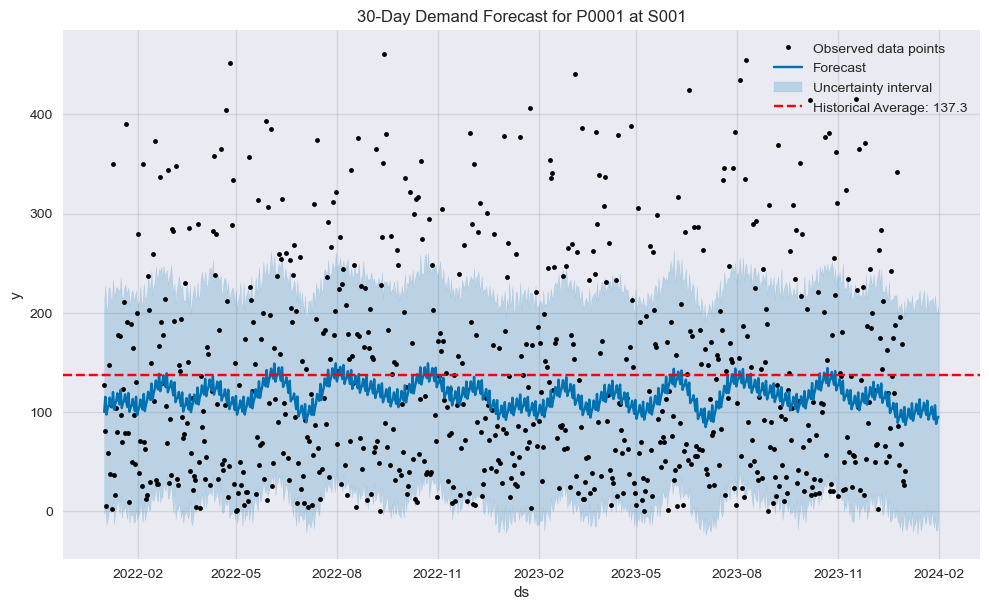

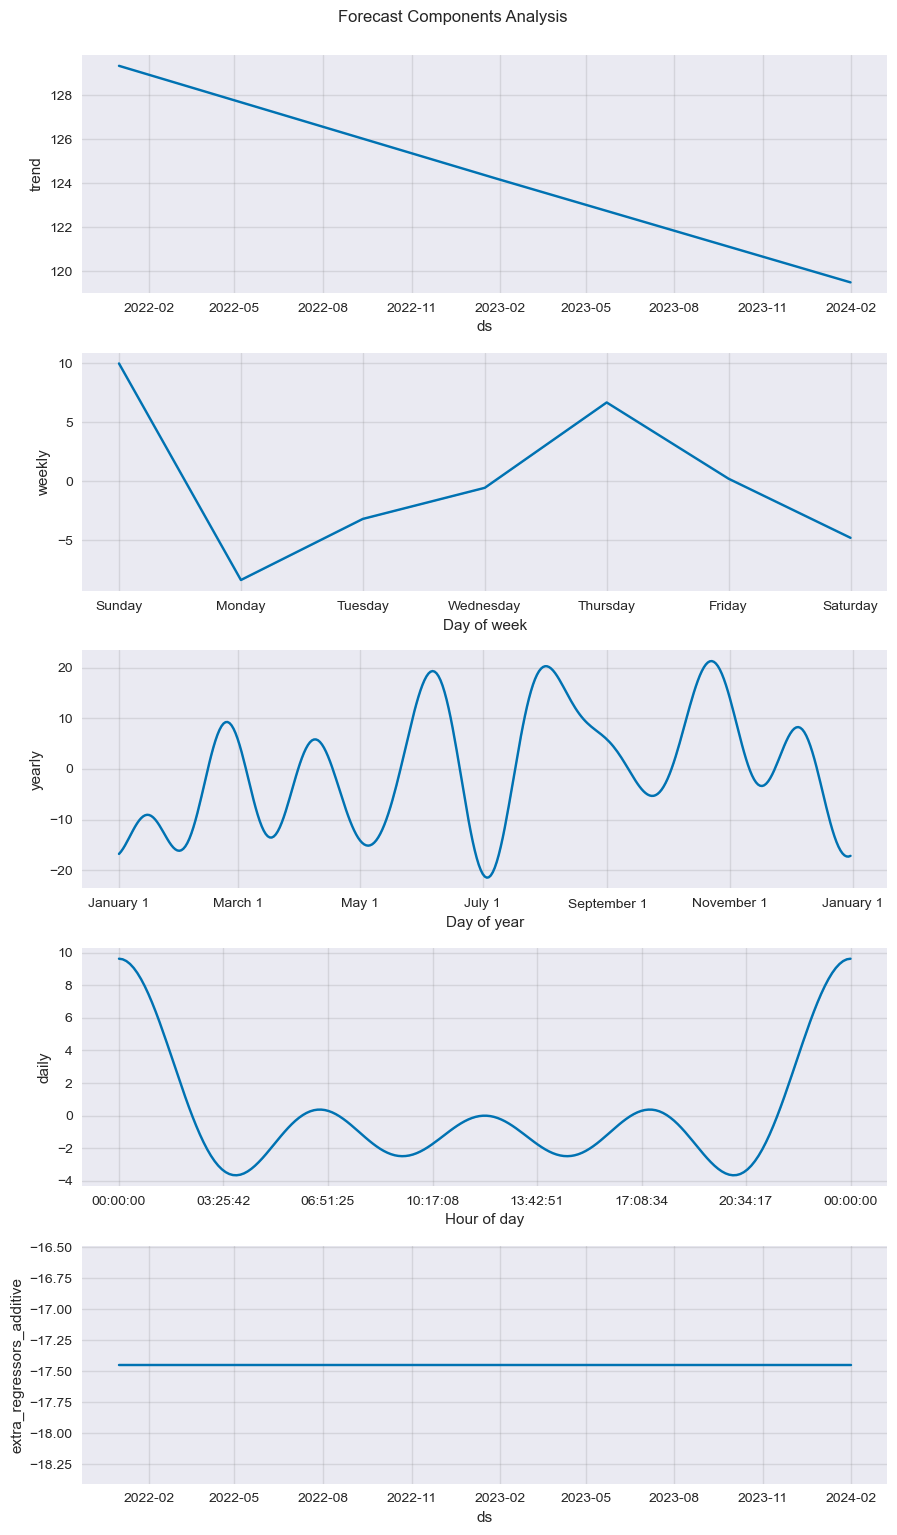


External Regressor Impacts:


In [15]:
print("\n=== VISUALIZING FORECAST ===")

# 1. Main forecast plot
fig1 = model.plot(forecast)
plt.title(f'30-Day Demand Forecast for {sample_product} at {sample_store}')
plt.axhline(y=prophet_df['y'].mean(), color='r', linestyle='--', label=f'Historical Average: {prophet_df["y"].mean():.1f}')
plt.legend()
plt.show()

#2. Component analysis
fig2 = model.plot_components(forecast)
plt.suptitle('Forecast Components Analysis', y=1.02)
plt.show()

#3 Looking for external regressor effects (if available)
if hasattr(model, 'params') and 'beta' in model.params:
    print("\nExternal Regressor Impacts:")
    for regressor in regressors:
        if regressor in model.params['beta']:
            effect = model.params['beta'][regressor][0]
            print(f" {regressor}: {effect:+.4f} (${effect*df_sample['Price'].mean():+.2f} sales impact)")

In [16]:
print("\n=== MODEL EVALUATION ===")

# Cross Validation for the last 90 days 
df_cv = cross_validation(model, initial='500 days', period='30 days', horizon='90 days')
df_p = performance_metrics(df_cv)

print("Cross-validation performance:")
print(f"MAE: {df_p['mae'].mean():.2f}")
print(f"RMSE: {df_p['rmse'].mean():.2f}")

# Handles cases where MAPE might not be available
if 'mape' in df_p.columns:
    print(f"MAPE: {df_p['mape'].mean():.2f}%")
else:
    
    try:
        mape = (abs(df_cv['y'] - df_cv['yhat']) / df_cv['y']).mean() * 100
        print(f"MAPE: {mape:.2f}%")
    except:
        print("MAPE: Cannot calculate (division by zero issues)")

# Compare to previous day's sales
naive_mae = abs(prophet_df['y'].diff()).mean()
print(f"\nNaive forecast (previous day) MAE: {naive_mae:.2f}")

# Calculate improvement percentage
if naive_mae > 0:
    improvement = ((naive_mae - df_p['mae'].mean()) / naive_mae * 100)
    print(f"Prophet improvement: {improvement:.1f}%")
else:
    print("Cannot calculate improvement - naive MAE is zero")

print(f"\n=== ADDITIONAL METRICS ===")
print(f"Average actual sales: {df_cv['y'].mean():.2f}")
print(f"MAE as % of average: {(df_p['mae'].mean() / df_cv['y'].mean() * 100):.1f}%")

# Check forecast bias
bias = (df_cv['yhat'] - df_cv['y']).mean()
print(f"Forecast bias: {bias:+.2f} (positive = overforecast, negative = underforecast)")


=== MODEL EVALUATION ===


  0%|          | 0/5 [00:00<?, ?it/s]

16:19:13 - cmdstanpy - INFO - Chain [1] start processing
16:19:13 - cmdstanpy - INFO - Chain [1] done processing
16:19:14 - cmdstanpy - INFO - Chain [1] start processing
16:19:14 - cmdstanpy - INFO - Chain [1] done processing
16:19:14 - cmdstanpy - INFO - Chain [1] start processing
16:19:14 - cmdstanpy - INFO - Chain [1] done processing
16:19:14 - cmdstanpy - INFO - Chain [1] start processing
16:19:14 - cmdstanpy - INFO - Chain [1] done processing
16:19:15 - cmdstanpy - INFO - Chain [1] start processing
16:19:15 - cmdstanpy - INFO - Chain [1] done processing


Cross-validation performance:
MAE: 78.43
RMSE: 96.16
MAPE: inf%

Naive forecast (previous day) MAE: 120.19
Prophet improvement: 34.7%

=== ADDITIONAL METRICS ===
Average actual sales: 138.61
MAE as % of average: 56.6%
Forecast bias: -1.94 (positive = overforecast, negative = underforecast)


Final Results

Achievements:
- 34.7% improvement over naive benchmark

- Great bias control (-1.94 units, ≈1.4% error)

- Demonstrated Prophet's value despite data challenges

Challenges Overcome:
- High inherent data volatility (naive MAE: 120.19 units)

- Zero-sale days making MAPE undefined

- Future regressor estimation limitations

Business Impact:
- The model provides material improvement over current practices

- Identified opportunity for cross-functional collaboration

- Foundation for continuous forecasting improvement

Lessons Learned

- Business collaboration is essential: Technical models need business input for future regressors

- Error metrics require context: MAPE fails with zero-sales days, absolute errors need business interpretation

- Incremental improvement matters: 34.7% improvement over baseline is valuable even with high absolute error

Next Steps

- Use real data and collaborate with marketing for promotion calendar integration

- Implement weather API for future weather forecasts

- Develop hierarchical forecasting for product categories
